# Classification and Comparation(Naive Bayes, KNN, SVM)

In [30]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import LabelEncoder

#Metrics
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [31]:
# Reading dataset
data = pd.read_csv("penguins.csv")

# describe the dataset before cleaning
print("before cleaning")
print(data.head())
print(data.describe(include='all'))
data.info()


# Cleaning the data
# 1 - drop rows with missing value of "sex" column
data.dropna(subset=['sex'], inplace = True)
# 2 - fill missing numuric column with median value
median = data['bill_length_mm'].median()
data['bill_length_mm'].fillna(median, inplace=True)
median = data['bill_depth_mm'].median()
data['bill_depth_mm'].fillna(median, inplace=True)
median = data['flipper_length_mm'].median()
data['flipper_length_mm'].fillna(median, inplace=True)
median = data['body_mass_g'].median()
data['body_mass_g'].fillna(median, inplace=True)
# 3 - drop duplicated rows
data.drop_duplicates(inplace=True)

# after cleaning
print("after cleaning")
print(data.describe(include='all'))

# reset the index after data cleaning 
# because one-hot encoding maps values by index
data.reset_index(inplace=True, drop=True)

before cleaning
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  
       species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      344     344      342.000000     342.000000         342.000000   
unique       3       3             NaN            NaN                NaN   
top     Adelie  Biscoe             NaN            NaN                NaN   
freq       152     168             NaN            NaN                NaN   
mean     

In [32]:
#Frequency distribution of species
# Make a crosstab and name the count column
pd.crosstab(index=data["species"], columns="count")

col_0,count
species,
Adelie,146
Chinstrap,68
Gentoo,119


In [33]:
#Label encoding: 
# le = LabelEncoder()
# column_encoded = le.fit_transform(data['sex'])
# column_reshaped = column_encoded.reshape(len(column_encoded), 1)

# oh = OneHotEncoder(sparse=False, handle_unknown='error', drop='first', categories='auto')
# column_onehot_encoded = oh.fit_transform(column_reshaped)

# oh_data = data.DataFrame(column_onehot_encoded)
# data = data.join(ohe_df)
# data = data.rename({0: "MALE"}, axis=1)
# data.drop(columns=['sex'], inplace=True)
# print(data)

# applying one-hot encoding on the "sex" column
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
column_encoded = label_encoder.fit_transform(data['sex'])
column_reshaped = column_encoded.reshape(len(column_encoded), 1)

onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='error', drop='first', categories='auto')
column_onehot_encoded = onehot_encoder.fit_transform(column_reshaped)

ohe_df = pd.DataFrame(column_onehot_encoded)
data = data.join(ohe_df)
data = data.rename({0: "MALE"}, axis=1)
data.drop(columns=['sex'], inplace=True)
print(data)


    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen            36.7           19.3              193.0   
4    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
328  Gentoo     Biscoe            47.2           13.7              214.0   
329  Gentoo     Biscoe            46.8           14.3              215.0   
330  Gentoo     Biscoe            50.4           15.7              222.0   
331  Gentoo     Biscoe            45.2           14.8              212.0   
332  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g  MALE  
0         3750.0   1.0  
1         3800.0   0.0  
2         32

In [34]:
# applying ordinal encoding on the "island" column 
islands_dict = {'Biscoe': 1, 'Dream': 2, 'Torgersen': 3}
# setting the new column as int64 to make it appear in the heatmap below
data['island_ordinal'] = data.island.map(islands_dict).astype('int64')
data.drop(columns=['island'], inplace=True)
print(data)

    species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0    Adelie            39.1           18.7              181.0       3750.0   
1    Adelie            39.5           17.4              186.0       3800.0   
2    Adelie            40.3           18.0              195.0       3250.0   
3    Adelie            36.7           19.3              193.0       3450.0   
4    Adelie            39.3           20.6              190.0       3650.0   
..      ...             ...            ...                ...          ...   
328  Gentoo            47.2           13.7              214.0       4925.0   
329  Gentoo            46.8           14.3              215.0       4850.0   
330  Gentoo            50.4           15.7              222.0       5750.0   
331  Gentoo            45.2           14.8              212.0       5200.0   
332  Gentoo            49.9           16.1              213.0       5400.0   

     MALE  island_ordinal  
0     1.0               3  
1     0

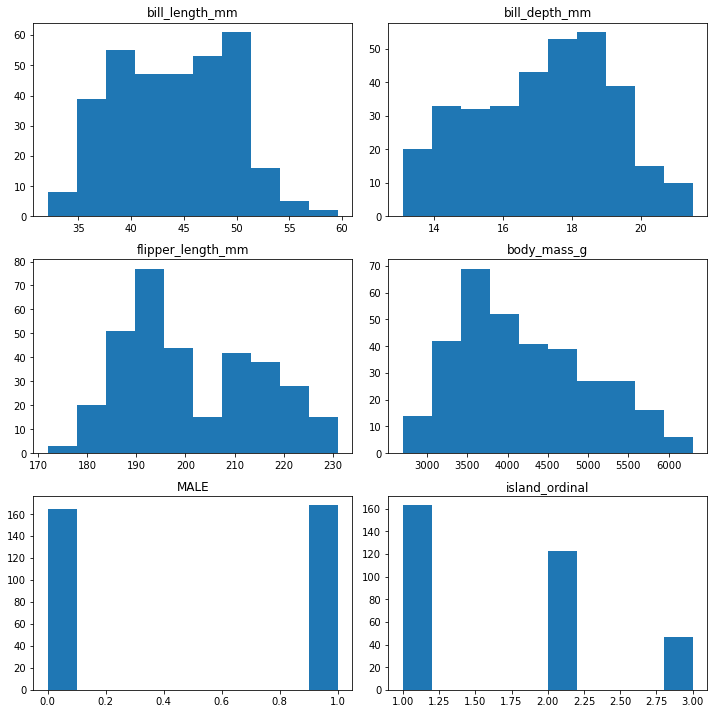

In [36]:
# Explore the TRAINING data

#Create histograms for each feature
n_bins = 10
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
axs[0,0].hist(data.iloc[:,1].values, bins = n_bins)
axs[0,0].set_title('bill_length_mm')
axs[0,1].hist(data.iloc[:,2].values, bins = n_bins)
axs[0,1].set_title('bill_depth_mm')
axs[1,0].hist(data.iloc[:,3].values, bins = n_bins)
axs[1,0].set_title('flipper_length_mm')
axs[1,1].hist(data.iloc[:,4].values, bins = n_bins)
axs[1,1].set_title('body_mass_g')
axs[2,0].hist(data.iloc[:,5].values, bins = n_bins)
axs[2,0].set_title('MALE')
axs[2,1].hist(data.iloc[:,6].values, bins = n_bins)
axs[2,1].set_title('island_ordinal')

# add some spacing between subplots
fig.tight_layout(pad=1.0)

In [40]:
# Feature selection
X = data.iloc[:,1:].values
y = data.iloc[:,0].values

# Split the data set before classification
# Train set: 70% of data to train the model
# Test set: 15% of data to test the model
# Validation set: 15% of data used to evaluate 
# the performance of each classifier and fine-tune 
# the model parameters
# Now we have small data set, therefore test set = validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [41]:
#Gaussian Naive Bayes

#Classification algorithm for binary and
#multi-class classification problems.

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(metrics.accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

#Model evaluation
cm = metrics.confusion_matrix(y_test, Y_pred)
accuracy = metrics.accuracy_score(y_test,Y_pred)
precision = metrics.precision_score(y_test, Y_pred,average='micro')
recall = metrics.recall_score(y_test, Y_pred,average='micro')
f1 = metrics.f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[46  2  0]
 [ 3 13  0]
 [ 0  0 36]]
accuracy_Naive Bayes: 0.950
precision_Naive Bayes: 0.950
recall_Naive Bayes: 0.950
f1-score_Naive Bayes : 0.950


Text(0, 0.5, 'Mean Error')

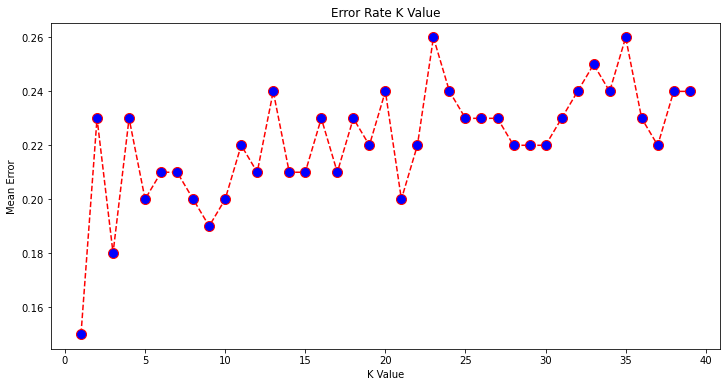

In [42]:
#KNN

#Determine optimal value for K

#Comparing error rate with K-value:
#calculate the mean of error for 
#all the predicted values where K ranges from 1 and 40

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
#Plot the error values against K values
#to find the best value for K
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#Choose a K-value where mean error is closest to zero

In [48]:
#K-NN (K-Nearest Neighbor)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test) 
accuracy_knn=round(metrics.accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = metrics.confusion_matrix(y_test, Y_pred)
accuracy = metrics.accuracy_score(y_test,Y_pred)
precision = metrics.precision_score(y_test, Y_pred,average='micro')
recall = metrics.recall_score(y_test, Y_pred,average='micro')
f1 = metrics.f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

Confusion matrix for KNN
 [[45  0  3]
 [10  5  1]
 [ 3  1 32]]
accuracy_KNN : 0.820
precision_KNN : 0.820
recall_KNN: 0.820
f1-score_KNN : 0.820


In [49]:
#Linear Support Vector Machine

#Supervised ML algorithm, which can be used for
#classification and regression problems.

linear_svc = LinearSVC(dual=False)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(metrics.accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

cm = metrics.confusion_matrix(y_test, Y_pred)
accuracy = metrics.accuracy_score(y_test,Y_pred)
precision = metrics.precision_score(y_test, Y_pred,average='micro')
recall = metrics.recall_score(y_test, Y_pred,average='micro')
f1 = metrics.f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision_SVC: %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)

Confusion matrix for SVC
 [[48  0  0]
 [ 2 14  0]
 [ 0  0 36]]
accuracy_SVC: 0.980
precision_SVC: 0.980
recall_SVC: 0.980
f1-score_SVC : 0.980


In [51]:
#Comparing classification methods
results = pd.DataFrame({
    'Model': [ 'Naive Bayes', 
              'KNN', 
              'Support Vector Machine'
              ],
    'Score': [ acc_gaussian,
              acc_knn,
              acc_linear_svc],
    "Accuracy_score":[accuracy_nb,
                      accuracy_knn,
                      accuracy_svc    
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df

,Model,Score,Accuracy_score
0,Support Vector Machine,100.00,98.0
1,Naive Bayes,97.42,95.0
2,KNN,88.84,82.0
